## Decision Trees

In [1]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image 

from lib.draw_tree import draw_tree
from sklearn.utils import resample

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## The digit classification dataset

In [2]:
D=datasets.load_digits()
print(D.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [3]:
print(D['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## Lets look at one example

In [4]:
k=10
print('label: ',D['target'][k])
print('image:\n',D['images'][k])

label:  0
image:
 [[ 0.  0.  1.  9. 15. 11.  0.  0.]
 [ 0.  0. 11. 16.  8. 14.  6.  0.]
 [ 0.  2. 16. 10.  0.  9.  9.  0.]
 [ 0.  1. 16.  4.  0.  8.  8.  0.]
 [ 0.  4. 16.  4.  0.  8.  8.  0.]
 [ 0.  1. 16.  5.  1. 11.  3.  0.]
 [ 0.  0. 12. 12. 10. 10.  0.  0.]
 [ 0.  0.  1. 10. 13.  3.  0.  0.]]


In [5]:
print(D['data'][k])

[ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
 16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
  0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
  0.  0.  0.  0.  1. 10. 13.  3.  0.  0.]


### Decision tree learning algorithm
Steps: 

1) Define decision tree object
```python
dtree=DecisionTreeClassifier(max_depth=4)
```

2) Train Tree (action taken on object, no assignment needed)
```python
dtree.fit(D.data,D.target)
```

3) Use tree to make predictions
```python
dtree.predict(D.data)
```

To learn more about learning decision trees in `sklearn` see [Reference](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

## Visualization of a Decision Tree

### Tree Depth=1

Note that with a tree of depth on you can only partition the labels into two sets.

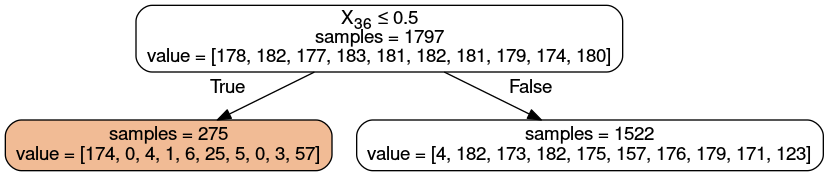

In [6]:
dtree=DecisionTreeClassifier(max_depth=1)
dtree.fit(D.data,D.target)
Image(draw_tree(dtree))

### Second step (Depth=2)

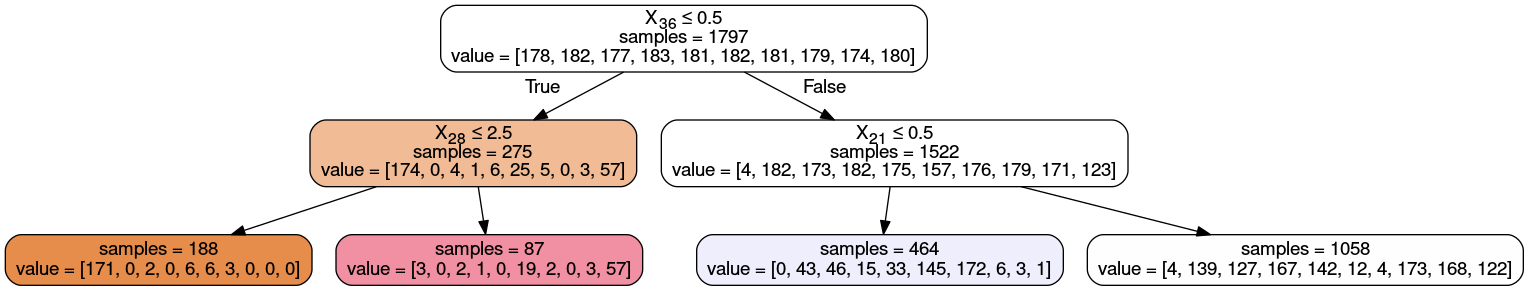

In [7]:
dtree=DecisionTreeClassifier(max_depth=2)
dtree.fit(D.data,D.target)
Image(draw_tree(dtree))

### Third step (Depth=3)

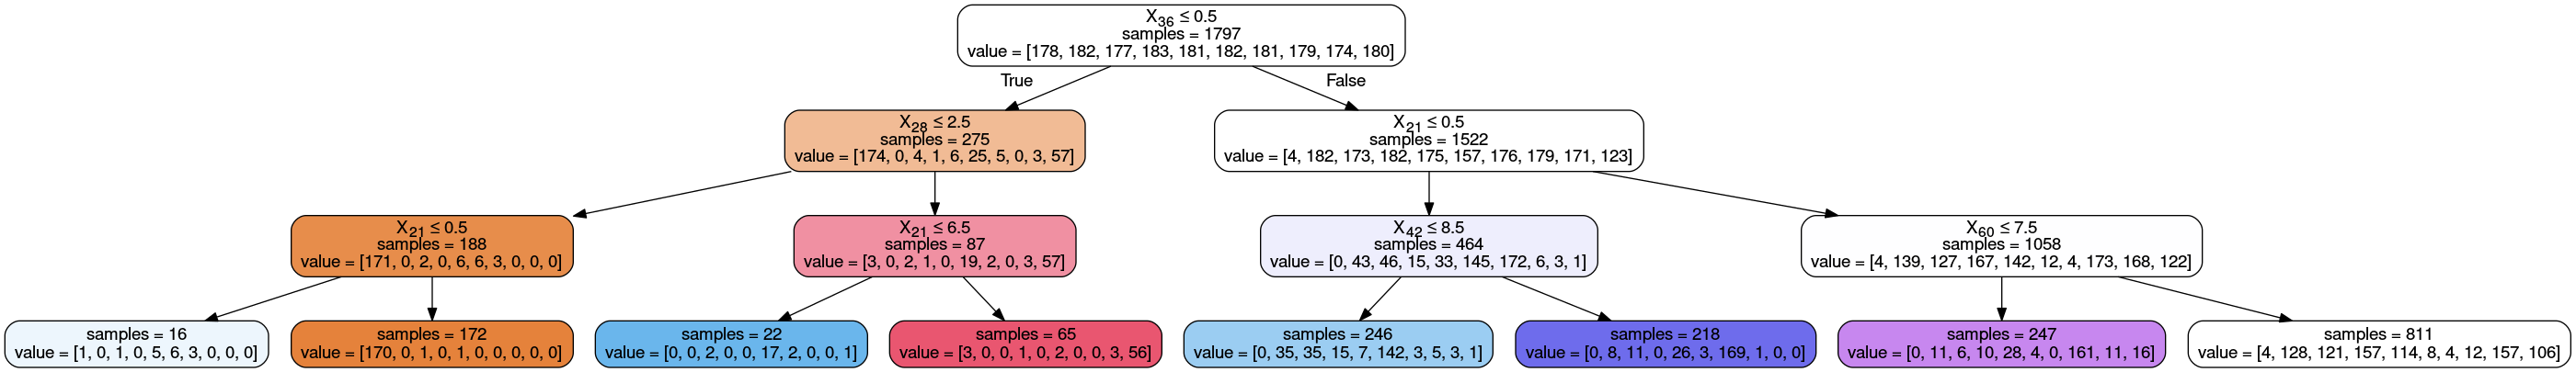

In [8]:
dtree=DecisionTreeClassifier(max_depth=3)
dtree.fit(D.data,D.target)
Image(draw_tree(dtree))

## Over-Fitting

### Split the data into training and testing

In [9]:
from sklearn.model_selection import train_test_split
#D_train, D_test, t_train, t_test = train_test_split(D.data, D.target, test_size=0.05,train_size=0.1, random_state=42)
D_train, D_test, t_train, t_test = train_test_split(D.data, D.target, test_size=0.5, random_state=42)

In [10]:
def err(dtree,X,y):
    yp=dtree.predict(X)
    errs=np.sum(yp!=y)+0.0
    return(errs/len(X)) 

In [11]:
train_err=[]
test_err=[]
node_count=[]
for i in range(1,30):
    dtree=DecisionTreeClassifier(max_depth=i)
    dtree.fit(D_train,t_train)
    train_err.append(err(dtree,D_train,t_train)),
    test_err.append(err(dtree,D_test,t_test))
    node_count.append(dtree.tree_.node_count)

### Plot Training error, test error & tree size

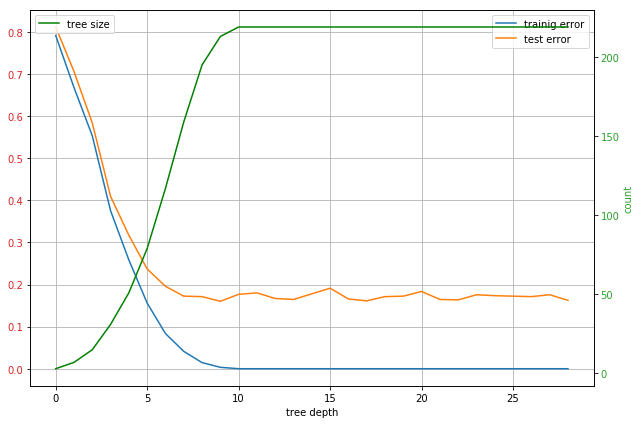

In [12]:
fig, ax1 = plt.subplots(figsize=[9,6]);

#the following code is designed to allow the error and the count to have
#different scales on the y-axis.
color = 'tab:red'
ax1.set_xlabel('tree depth')
ax1.plot(train_err,label='trainig error')
ax1.plot(test_err,label='test error')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend()
ax1.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('count', color=color)  # we already handled the x-label with ax1
ax2.plot(node_count,'g',label='tree size')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show();

## Cross Validation
When the data is small, we can't afford to split the data   
to 50% train and 50% test. 

We need to use a larger fraction of the data for training. Say 90% training.

However, with 10% test we get a very crude estimate of the test error.

**Cross Validation** is a method that allows 90% of the data to be used for training and still use all of the data for testing.

For 90% we use **10-fold** cross validation. We split the data to 10 parts of approimately equal size. We then perform the following training and testing:

1) Train on all but $1$ test on $1$  ($1$ is held out)  
2) Train on all but $2$ test on $2$  ($2$ is held out)  
3) ...    
...  
10) Train on all but $10$ test on $10$ ($10$ is held out)

Note that each example in the datasets appears exactly once in the test set. By summing the test errors on all of the held out parts we get a good estimate of the test error.

In [ ]:
from sklearn.model_selection import cross_val_score
scores=[]
for i in range(1,30):  #Consider trees of depth 1-30
    dtree=DecisionTreeClassifier(max_depth=i)
    scores.append(np.mean(cross_val_score(dtree, D.data, D.target, cv=10)))

In [ ]:
figure(figsize=[9,6])
plot(1.-np.array(scores))
grid()
ylim([0,0.85])
title('10 fold cross validation');

In this case we see that cross validation is not necessary because our data is large enough.

## Confusion matrix
When we have more than two possible labels, there are different types of mistakes. 

To gain some insight into the types of mistakes, we use the **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
dtree=DecisionTreeClassifier(max_depth=8)
dtree.fit(D_train,t_train)
A=confusion_matrix(t_test,dtree.predict(D_test))

print('pred label  ',''.join(['%3d'%j for j in range(10)]))
for i in range(A.shape[0]):
    print('true label %d'%i,A[i,:])

* `8,5,3,1' are confused with each other

In [ ]:
choice=[1,3,5,8]
A[choice,:][:,choice]

## Summary
* Decision trees greedily imporve the purity function
* Decision trees overfit if their depth is too large
* Cross validation is more accurate that a single train/test split when the training data is small. 
* Confusion matrix identify label pairs that are often confused with each other.